In [9]:
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp

In [2]:
duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs

In [3]:
signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

In [4]:
t

array([ 0.    ,  0.0025,  0.005 ,  0.0075,  0.01  ,  0.0125,  0.015 ,
        0.0175,  0.02  ,  0.0225,  0.025 ,  0.0275,  0.03  ,  0.0325,
        0.035 ,  0.0375,  0.04  ,  0.0425,  0.045 ,  0.0475,  0.05  ,
        0.0525,  0.055 ,  0.0575,  0.06  ,  0.0625,  0.065 ,  0.0675,
        0.07  ,  0.0725,  0.075 ,  0.0775,  0.08  ,  0.0825,  0.085 ,
        0.0875,  0.09  ,  0.0925,  0.095 ,  0.0975,  0.1   ,  0.1025,
        0.105 ,  0.1075,  0.11  ,  0.1125,  0.115 ,  0.1175,  0.12  ,
        0.1225,  0.125 ,  0.1275,  0.13  ,  0.1325,  0.135 ,  0.1375,
        0.14  ,  0.1425,  0.145 ,  0.1475,  0.15  ,  0.1525,  0.155 ,
        0.1575,  0.16  ,  0.1625,  0.165 ,  0.1675,  0.17  ,  0.1725,
        0.175 ,  0.1775,  0.18  ,  0.1825,  0.185 ,  0.1875,  0.19  ,
        0.1925,  0.195 ,  0.1975,  0.2   ,  0.2025,  0.205 ,  0.2075,
        0.21  ,  0.2125,  0.215 ,  0.2175,  0.22  ,  0.2225,  0.225 ,
        0.2275,  0.23  ,  0.2325,  0.235 ,  0.2375,  0.24  ,  0.2425,
        0.245 ,  0.2

In [5]:
signal

array([ 1.        ,  0.97295768,  0.84319119,  0.61685866,  0.31165687,
       -0.04395215, -0.41296169, -0.75341365, -1.02308934, -1.18482474,
       -1.21181324, -1.09216072, -0.8319516 , -0.45619014, -0.00720057,
        0.4596103 ,  0.88233759,  1.20081779,  1.3654765 ,  1.34549858,
        1.13496981,  0.75578765,  0.25651065, -0.29311808, -0.81154718,
       -1.21755327, -1.44338742, -1.4467994 , -1.21975789, -0.79202444,
       -0.22845951,  0.3800417 ,  0.93092382,  1.3274956 ,  1.49662849,
        1.40332339,  1.05912096,  0.52224498, -0.11119527, -0.72389097,
       -1.19916674, -1.44392832, -1.40812138, -1.09644886, -0.56939238,
        0.06735714,  0.6835126 ,  1.15098705,  1.37136758,  1.2980269 ,
        0.94764065,  0.39796245, -0.22831021, -0.79050215, -1.16193996,
       -1.25959787, -1.06422567, -0.62572152, -0.05188822,  0.51723521,
        0.94354044,  1.12516413,  1.02220911,  0.66701323,  0.15589971,
       -0.3758618 , -0.78960292, -0.9799924 , -0.90303487, -0.58

In [6]:
#The amplitude envelope is given by magnitude of the analytic signal. 
#The instantaneous frequency can be obtained by differentiating the instantaneous phase in respect to time. 
#The instantaneous phase corresponds to the phase angle of the analytic signal.

analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) / (2.0*np.pi) * fs

In [7]:
instantaneous_phase

array([ -2.89494825e-01,   1.28919690e-01,   5.61820659e-01,
         9.05157987e-01,   1.27027577e+00,   1.61206530e+00,
         1.94923360e+00,   2.29522710e+00,   2.62413810e+00,
         2.97384309e+00,   3.30574747e+00,   3.65802551e+00,
         3.99926963e+00,   4.35367914e+00,   4.70688983e+00,
         5.06411416e+00,   5.42891030e+00,   5.79064607e+00,
         6.16461907e+00,   6.53298584e+00,   6.91308349e+00,
         7.28977721e+00,   7.67373277e+00,   8.05933435e+00,
         8.44656649e+00,   8.84037443e+00,   9.23198297e+00,
         9.63245701e+00,   1.00303979e+01,   1.04359840e+01,
         1.08419055e+01,   1.12518347e+01,   1.16661912e+01,
         1.20808502e+01,   1.25027525e+01,   1.29234113e+01,
         1.33512749e+01,   1.37792976e+01,   1.42118930e+01,
         1.46478900e+01,   1.50851318e+01,   1.55285884e+01,
         1.59715449e+01,   1.64211861e+01,   1.68712886e+01,
         1.73259638e+01,   1.77839564e+01,   1.82434603e+01,
         1.87088492e+01,

(0.0, 120.0)

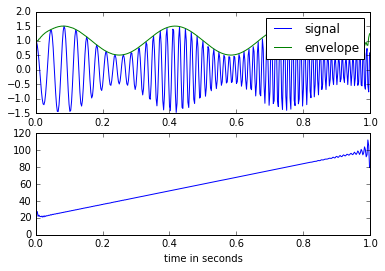

In [12]:
fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)

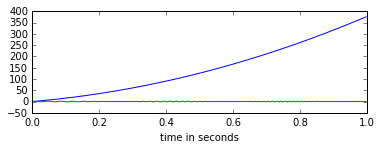

In [17]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(211)
ax2.plot(t, instantaneous_phase, label='phase')
ax2.plot(t, signal, label='envelope')
ax2.set_xlabel("time in seconds")
#ax2.legend()